In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
working_dir = os.getcwd()

train_data = pd.read_csv(f'{working_dir}/../data/TrainData.csv')
X = train_data['WS10'].values.reshape(-1, 1)  # Wind speed at 10m above ground level
y = train_data['POWER'].values               # Normalized power values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
k = 1000  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1000)

In [11]:
weather_forecast = pd.read_csv(f'{working_dir}/../data/WeatherForecastInput.csv')
X_eval = weather_forecast['WS10'].values.reshape(-1, 1)
y_eval_knn = knn.predict(X_eval)

In [12]:
forecast_template_knn = pd.read_csv(f'{working_dir}/../data/ForecastTemplate.csv')
forecast_template_knn['FORECAST'] = y_eval_knn
forecast_template_knn.to_csv(f'{working_dir}/results/ForecastTemplate1-kNN.csv', index=False)

In [13]:
y_true = pd.read_csv(f'{working_dir}/../data/Solution.csv')['POWER'].values
rmse_knn = np.sqrt(mean_squared_error(y_true, y_eval_knn))
print("RMSE for kNN model:", rmse_knn)

RMSE for kNN model: 0.21696126679520797


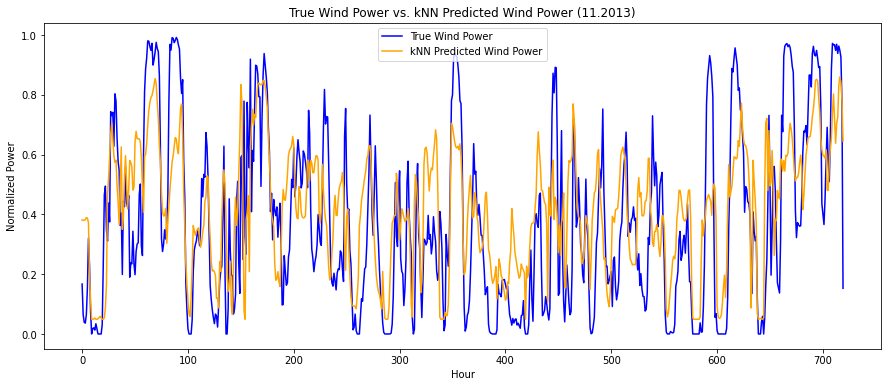

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Wind Power', color='blue')
plt.plot(y_eval_knn, label='kNN Predicted Wind Power', color='orange')
plt.legend()
plt.title('True Wind Power vs. kNN Predicted Wind Power (11.2013)')
plt.xlabel('Hour')
plt.ylabel('Normalized Power')
plt.show()

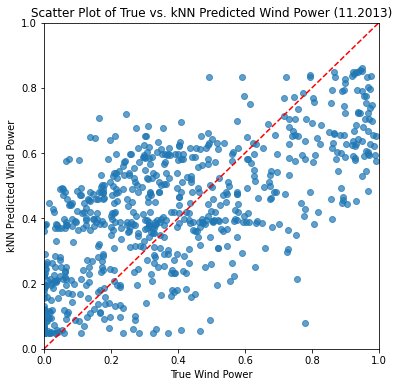

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_eval_knn, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('True Wind Power')
plt.ylabel('kNN Predicted Wind Power')
plt.title('Scatter Plot of True vs. kNN Predicted Wind Power (11.2013)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [16]:
working_dir = os.getcwd()

train_data = pd.read_csv(f'{working_dir}/../data/TrainData.csv')
X = train_data['WS10'].values.reshape(-1, 1)  # Wind speed at 10m above ground level
y = train_data['POWER'].values               # Normalized power values

In [17]:
k = 1000  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1000)

In [18]:
forecast_template_knn = pd.read_csv(f'{working_dir}/../data/ForecastTemplate.csv')
forecast_template_knn['FORECAST'] = y_eval_knn
forecast_template_knn.to_csv(f'{working_dir}/results/ForecastTemplate1-kNN.csv', index=False)

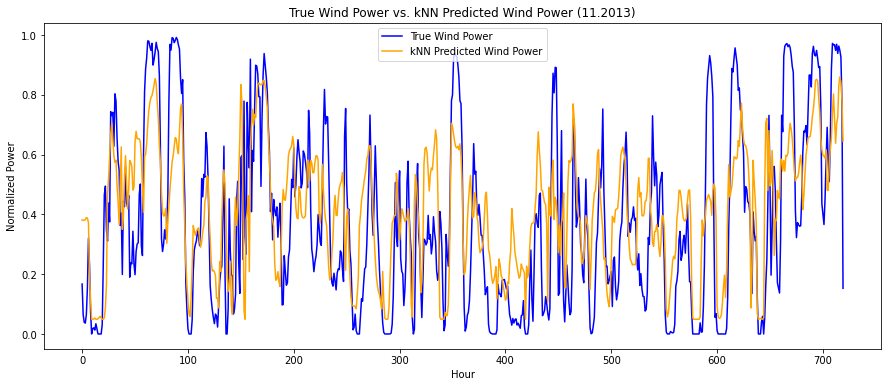

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Wind Power', color='blue')
plt.plot(y_eval_knn, label='kNN Predicted Wind Power', color='orange')
plt.legend()
plt.title('True Wind Power vs. kNN Predicted Wind Power (11.2013)')
plt.xlabel('Hour')
plt.ylabel('Normalized Power')
plt.show()